In [15]:
import numpy as np                      # numpy este o biblioteca pt calcul numeric si stiintific (numerical python)
import pandas as pd                     # pandas este folosit pt manipularea datelor (filtrare, sortare, agregare)
import matplotlib.pyplot as plt         # biblioteca grafica (asemanator cu matlab)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

The data is taken from https://archive.ics.uci.edu/dataset/846/accelerometer
I will use the dataset to determin if and when a cooler fan with weights on its blades will fail due to the vibrations from the mass distributed weights.

wconfig: 1 - weights on 2 neighboring blades
         2 - weights at a 90 degrees angle
         3 - weights at on opposite blades

pctid: speed of the fan (from 20% power to 100%)

x & y & z: data from vibrations measured

In [6]:
data = pd.read_csv("accelerometer.csv")    # reading the full data
print(data)

        wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   wconfid    153000 non-null  int64  
 1   pctid      153000 non-null  int64  
 2   x          153000 non-null  float64
 3   y          153000 non-null  float64
 4   z          153000 non-null  float64
 5   vibration  153000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 7.0 MB


array([[<Axes: title={'center': 'wconfid'}>,
        <Axes: title={'center': 'pctid'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'vibration'}>]], dtype=object)

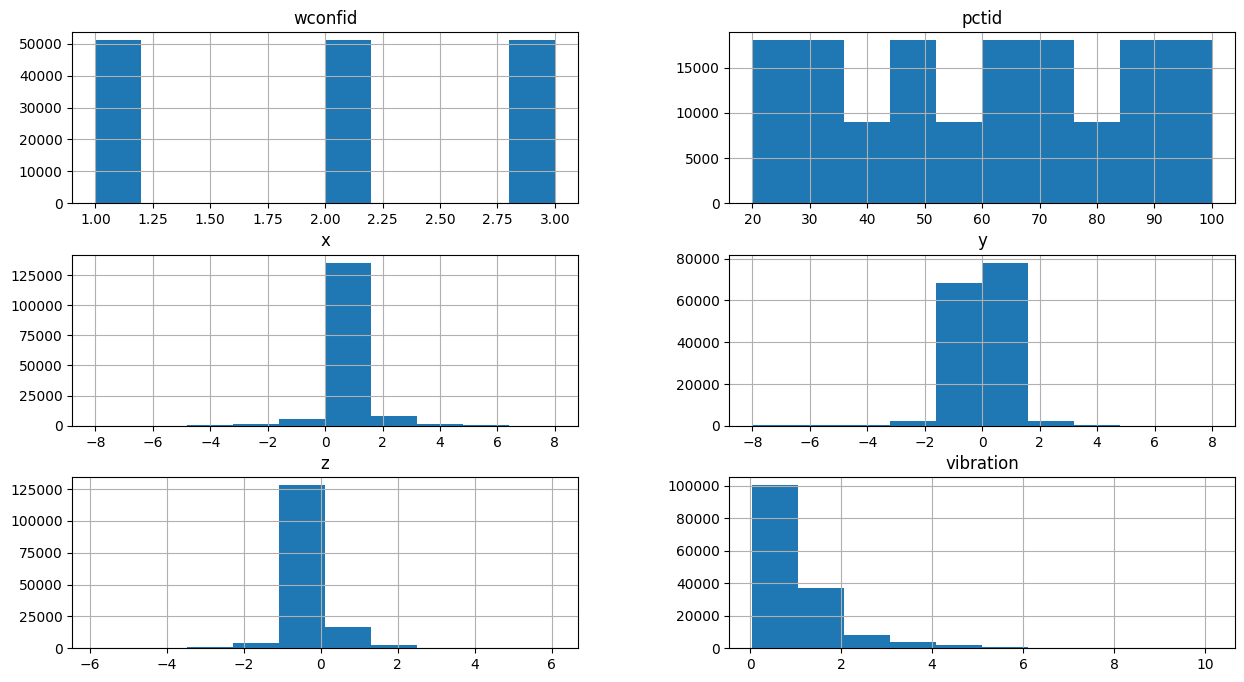

In [21]:
data.hist(figsize=(15,8))

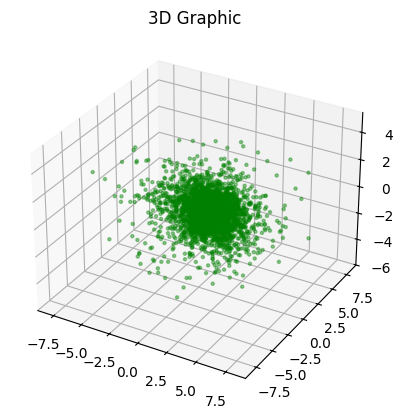

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')                                                          # matplot has only XoY, I add the Z as well with projection

data_sampled = data.sample(frac=0.1)                                                                # I keep only 10% of the data
ax.scatter(data_sampled['x'], data_sampled['y'], data_sampled['z'], c='green', s=5, alpha=0.4)      # s = size; alpha = transparancy
ax.set_title("3D Graphic")
plt.show()

In [8]:
data['vibration'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)                                                                     # formula for calculating vibrations

scaler = MinMaxScaler()                                                                                                                     # scaler between 0 and 1
data_scaled = pd.DataFrame(scaler.fit_transform(data[['vibration', 'wconfid', 'pctid']]), columns=['vibration', 'wconfid', 'pctid'])        # take and convert just the 3 columns

data_scaled['wear_score'] = 0.5 * data_scaled['vibration'] + 0.3 * data_scaled['wconfid'] + 0.2 * data_scaled['pctid']                      # came with this formula of the wear based on the 3 main factors
data_scaled['time_till_death']=(1-data_scaled['wear_score'])* np.random.uniform(100, 200)                                                   # same with the time untill it fails
print(data_scaled)

        vibration  wconfid  pctid  wear_score  time_till_death
0        0.095588      0.0    0.0    0.047794       101.147490
1        0.095283      0.0    0.0    0.047642       101.163690
2        0.092116      0.0    0.0    0.046058       101.331914
3        0.092315      0.0    0.0    0.046157       101.321364
4        0.094764      0.0    0.0    0.047382       101.191256
...           ...      ...    ...         ...              ...
152995   0.102631      1.0    1.0    0.551315        47.661262
152996   0.086888      1.0    1.0    0.543444        48.497407
152997   0.112026      1.0    1.0    0.556013        47.162259
152998   0.091175      1.0    1.0    0.545588        48.269684
152999   0.115482      1.0    1.0    0.557741        46.978691

[153000 rows x 5 columns]


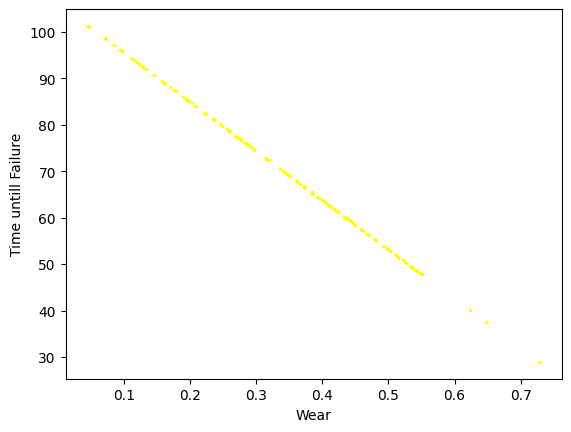

        wear_score  time_till_death
0         0.047794       101.147490
1         0.047642       101.163690
2         0.046058       101.331914
3         0.046157       101.321364
4         0.047382       101.191256
...            ...              ...
152995    0.551315        47.661262
152996    0.543444        48.497407
152997    0.556013        47.162259
152998    0.545588        48.269684
152999    0.557741        46.978691

[153000 rows x 2 columns]


In [9]:
print_needed_data = pd.DataFrame(data_scaled, columns=['wear_score', 'time_till_death'])                                 # simplified the data I need for my graph
scatter_sampled = print_needed_data.sample(frac=0.001)                                                                   # I keep only 0.1% of the data

plt.scatter(scatter_sampled['wear_score'],scatter_sampled['time_till_death'], color='yellow', s=2)

plt.xlabel("Wear")
plt.ylabel("Time untill Failure")
plt.show()
print(print_needed_data)

In [16]:
train_data, valid_data, test_data = np.split(data_scaled.sample(frac=1), [int (0.7*len(data_scaled)),int (0.9*len(data_scaled))])

# 70% of the data will be the training data
# from 70% to 90% (20%) will be my validation data
# the rest of 10% will be the testing data

print(train_data)

        vibration  wconfid   pctid  wear_score  time_till_death
17993    0.103774      0.0  0.3125    0.114387        94.073731
5382     0.095293      0.0  0.0625    0.060146        99.835387
52462    0.098591      0.5  0.0000    0.199295        85.054364
122714   0.091050      1.0  0.3750    0.420525        61.554361
21595    0.111721      0.0  0.4375    0.143361        90.996006
...           ...      ...     ...         ...              ...
107963   0.093864      1.0  0.0625    0.359432        68.043955
142919   0.110564      1.0  0.8125    0.517782        51.223311
99948    0.126774      0.5  1.0000    0.413387        62.312636
90392    0.372697      0.5  0.8125    0.498848        53.234540
41958    0.071768      0.0  0.8125    0.198384        85.151154

[107100 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The best algorithm for this type of problem is Neural Network, because we do not have the time until failure measured. So it is not a regression or a classification problem, to have an output known.
For this solution, I will use TensorFlow, because it is an open source library with the hidden layers already trained.

In [11]:
import tensorflow as tf

In [14]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_los'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_scaled = train_data [['vibration', 'wconfid','pctid']]
y_scaled = train_data ['time_till_death']

X_train 